# Exporatory Data Analysis

In [89]:
### Install and Import libraries

In [90]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install statsmodels


In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pathlib
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import grangercausalitytests

### Load dataset

In [92]:
dataset_path = "data/Tetuan City power consumption.csv"
data = pd.read_csv(dataset_path, parse_dates=["DateTime"])
data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


### Summary Statistics

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  datetime64[ns]
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind Speed                 52416 non-null  float64       
 4   general diffuse flows      52416 non-null  float64       
 5   diffuse flows              52416 non-null  float64       
 6   Zone 1 Power Consumption   52416 non-null  float64       
 7   Zone 2  Power Consumption  52416 non-null  float64       
 8   Zone 3  Power Consumption  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


In [94]:
data.isnull().sum()

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

In [95]:
data.dtypes

DateTime                     datetime64[ns]
Temperature                         float64
Humidity                            float64
Wind Speed                          float64
general diffuse flows               float64
diffuse flows                       float64
Zone 1 Power Consumption            float64
Zone 2  Power Consumption           float64
Zone 3  Power Consumption           float64
dtype: object

<Axes: xlabel='Temperature', ylabel='Count'>

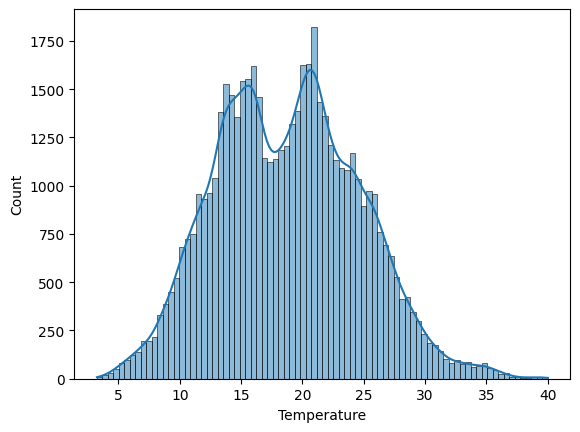

In [96]:
sns.histplot(data['Temperature'], kde= True)

<Axes: xlabel='Humidity', ylabel='Count'>

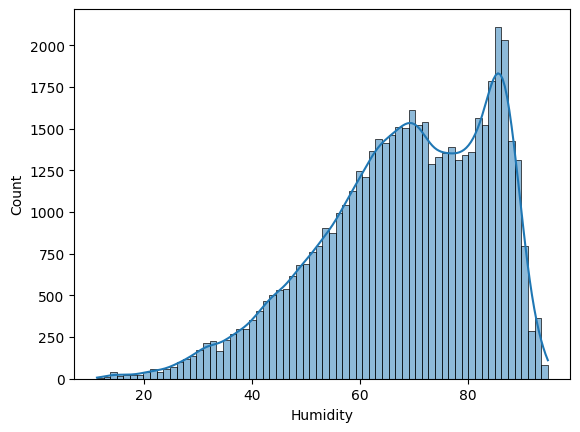

In [97]:
sns.histplot(data['Humidity'], kde= True)

<Axes: xlabel='Wind Speed', ylabel='Count'>

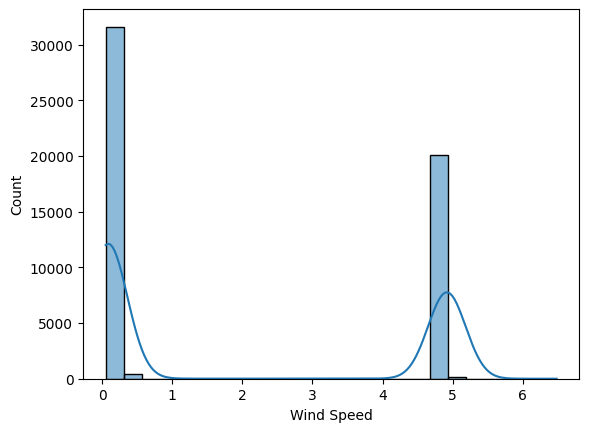

In [98]:
sns.histplot(data['Wind Speed'], kde= True)

<Axes: xlabel='general diffuse flows', ylabel='Count'>

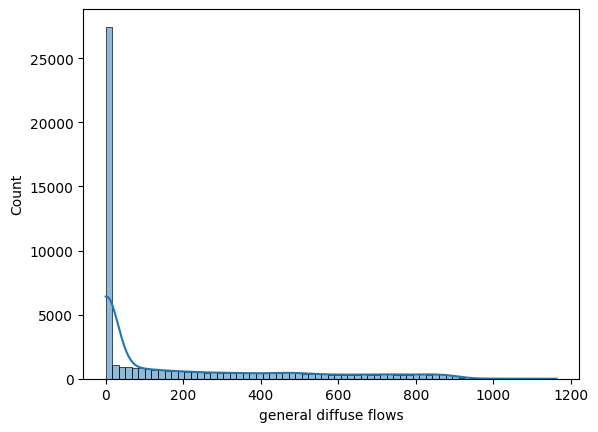

In [99]:
sns.histplot(data['general diffuse flows'], kde= True)

<Axes: xlabel='diffuse flows', ylabel='Count'>

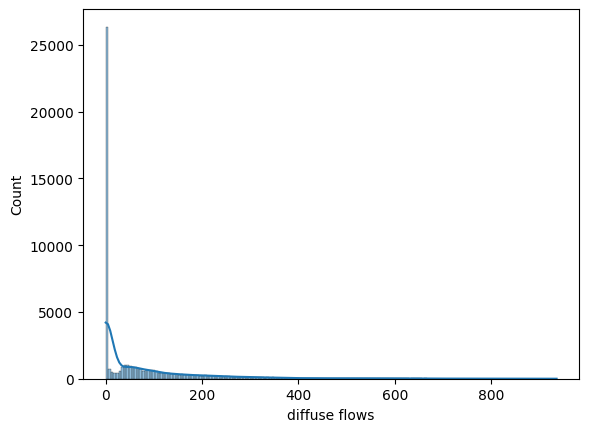

In [100]:
sns.histplot(data['diffuse flows'], kde= True)


### 🧭 1. Time Consistency & Structure

In [101]:
# Sampling Frequency
data["DateTime"] = pd.to_datetime(data["DateTime"])
data['delta'] = data['DateTime'].diff()  #Difference in time
print(data['delta'].value_counts())


delta
0 days 00:10:00    52415
Name: count, dtype: int64


In [102]:
#Frequency of the data
frequency = pd.infer_freq(data["DateTime"])
print(f"Frequency of the data: {frequency}")

Frequency of the data: 10min


In [103]:
avg_delta  = data['DateTime'].diff().mean()
print(f"Average time difference: {avg_delta}")

Average time difference: 0 days 00:10:00


In [104]:
# Check consistency
is_consistent = data['delta'].nunique() == 1
if is_consistent:
    print("The data is consistent with a uniform time difference.")
else:
    print("The data is not consistent; it has varying time differences.")

The data is consistent with a uniform time difference.


In [105]:
# Identify missing or Irregular gaps
missing_data = data[data['delta'].isnull()]
if not missing_data.empty:
    print("Missing or irregular gaps found in the data:")
    print(missing_data)
    # Fill missing values with interpolation
    data['Zone 1 Power Consumption'] = data['Zone 1 Power Consumption'].interpolate()
    data['Zone 2  Power Consumption'] = data['Zone 2  Power Consumption'].interpolate()
    data['Zone 3  Power Consumption'] = data['Zone 3  Power Consumption'].interpolate()
    print("Missing values have been filled with interpolation.")
else:
    print("No missing or irregular gaps found in the data.")

Missing or irregular gaps found in the data:
    DateTime  Temperature  Humidity  Wind Speed  general diffuse flows  \
0 2017-01-01        6.559      73.8       0.083                  0.051   

   diffuse flows  Zone 1 Power Consumption  Zone 2  Power Consumption  \
0          0.119                34055.6962                16128.87538   

   Zone 3  Power Consumption delta  
0                20240.96386   NaT  
Missing values have been filled with interpolation.


In [106]:
data['DateTime'].duplicated().sum()

0

### 📊 2. Temporal Trends & Seasonality



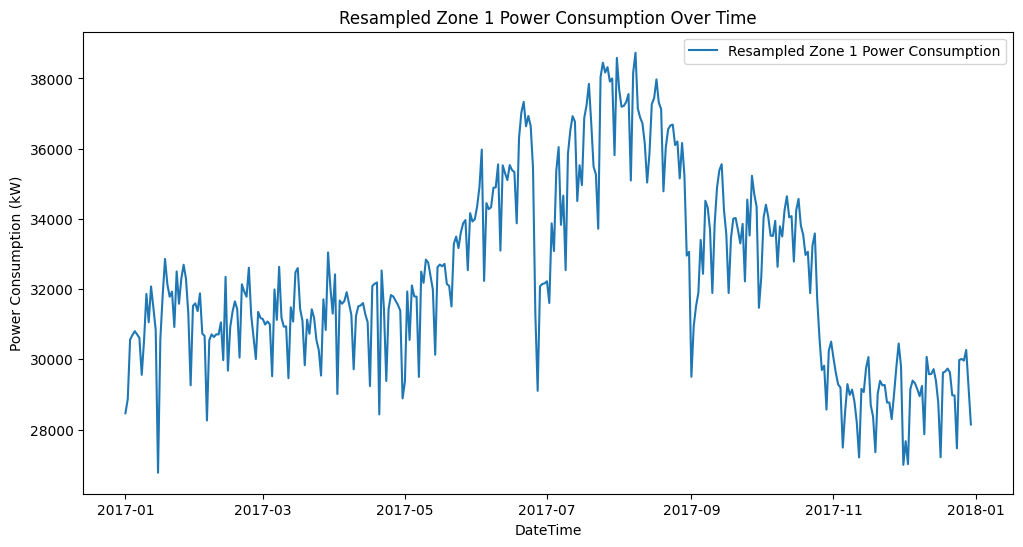

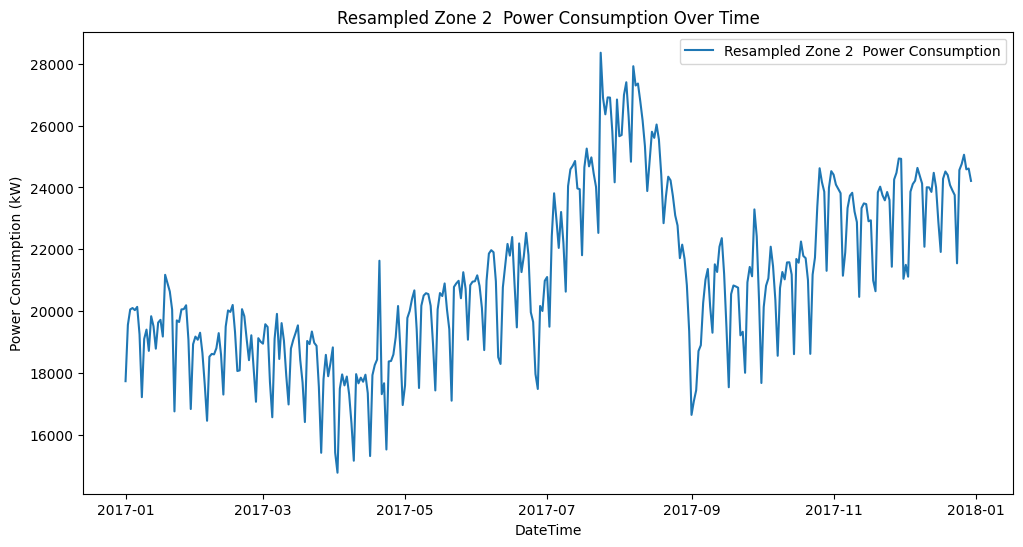

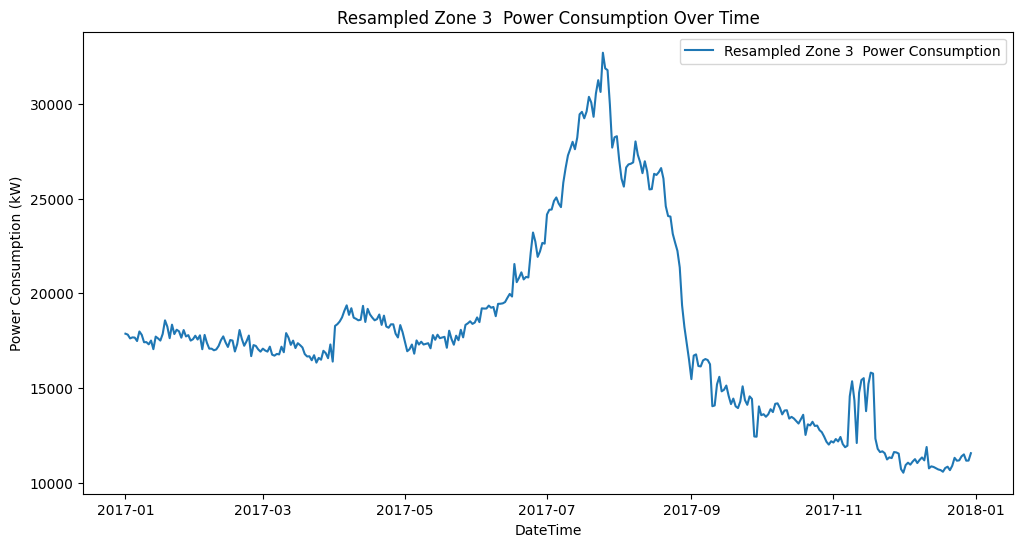

In [107]:
zones_column= ['Zone 1 Power Consumption','Zone 2  Power Consumption', 'Zone 3  Power Consumption']
for zone in zones_column:
    data_resampled_all = data.resample("D", on="DateTime").mean().interpolate().reset_index()
    plt.figure(figsize=(12, 6))
    plt.plot(data_resampled_all["DateTime"], data_resampled_all[zone], label=f"Resampled {zone}")
    plt.xlabel("DateTime")
    plt.ylabel("Power Consumption (kW)")
    plt.title(f"Resampled {zone} Over Time")
    plt.legend()
    plt.show()

In [108]:
data.set_index('DateTime', inplace=True)

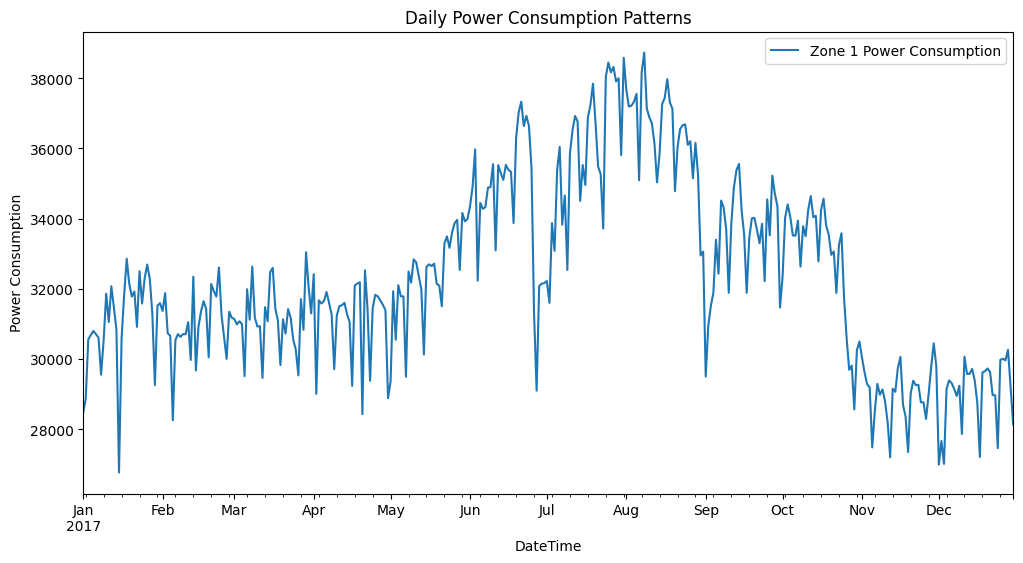

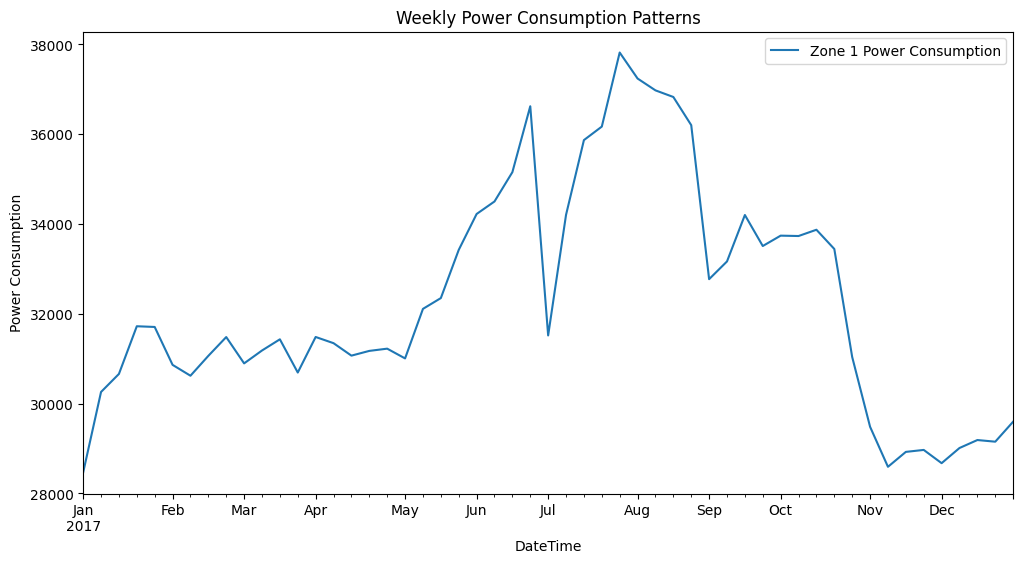

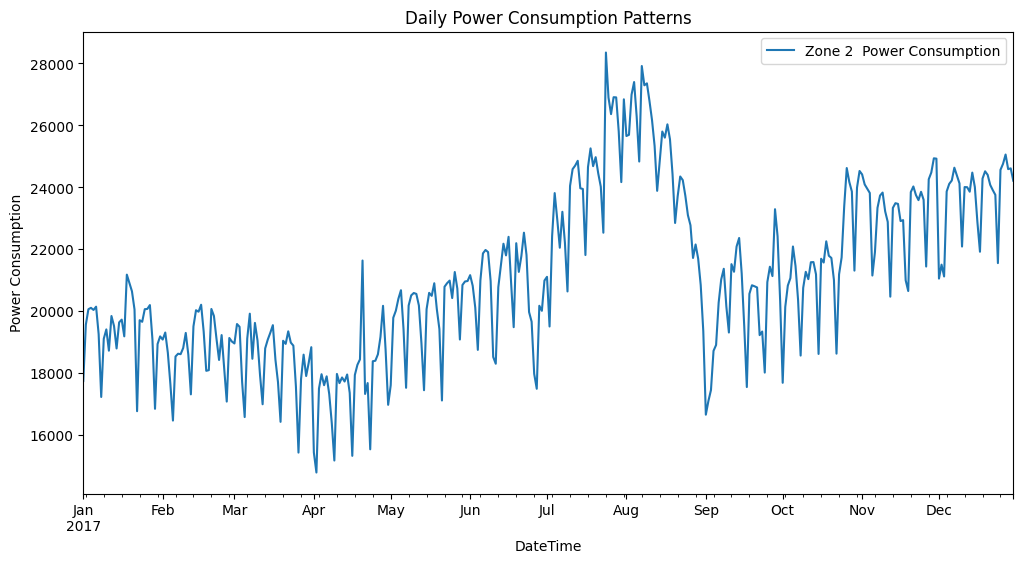

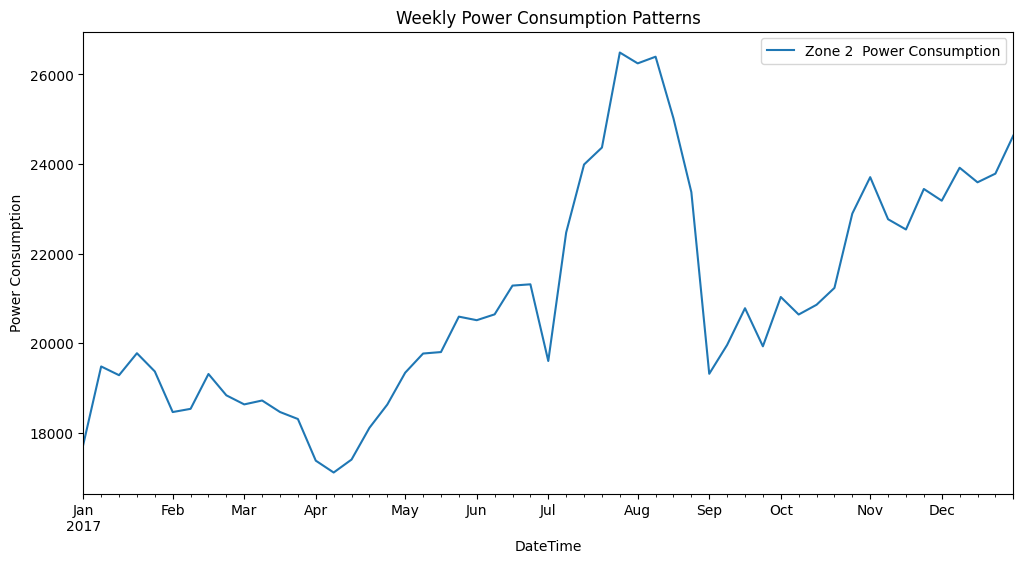

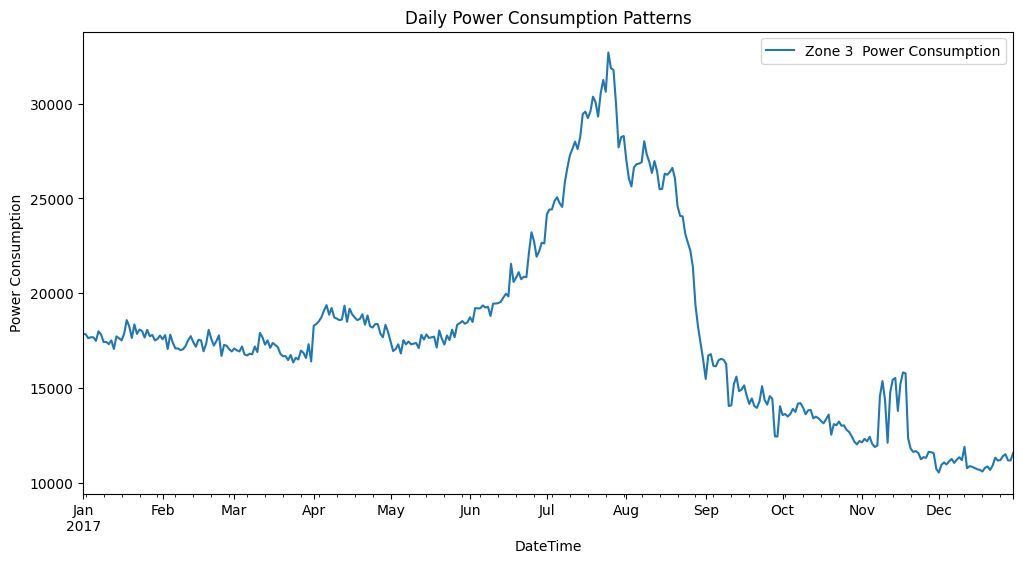

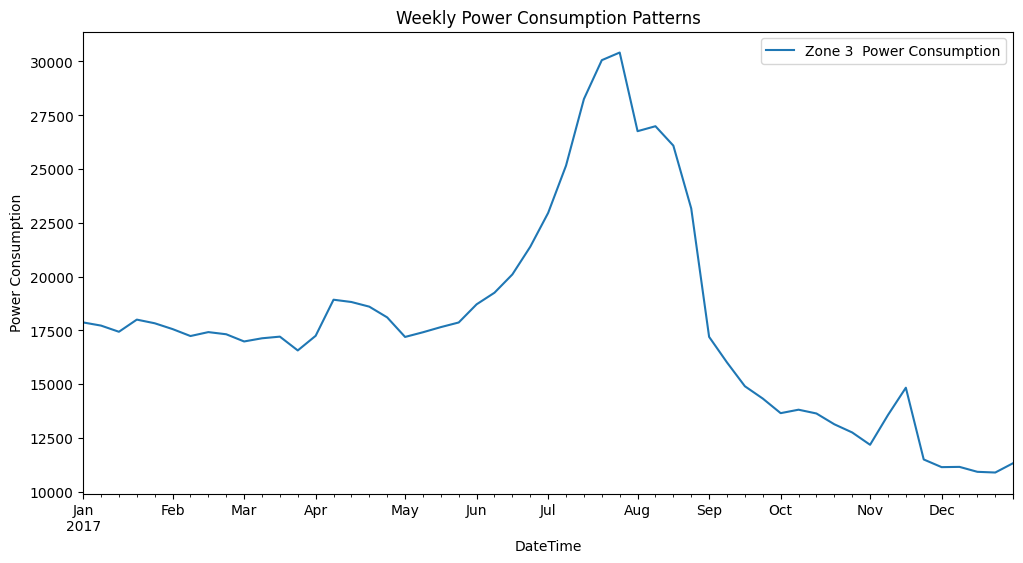

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Resample to daily and weekly averages
daily_avg = data.resample('D').mean()
weekly_avg = data.resample('W').mean()

# Plot daily patterns
daily_avg[['Zone 1 Power Consumption']].plot(figsize=(12, 6))
plt.title('Daily Power Consumption Patterns')
plt.ylabel('Power Consumption')
plt.show()

# Plot weekly patterns
weekly_avg[['Zone 1 Power Consumption']].plot(figsize=(12, 6))
plt.title('Weekly Power Consumption Patterns')
plt.ylabel('Power Consumption')
plt.show()

# Plot daily patterns
daily_avg[['Zone 2  Power Consumption']].plot(figsize=(12, 6))
plt.title('Daily Power Consumption Patterns')
plt.ylabel('Power Consumption')
plt.show()

# Plot weekly patterns
weekly_avg[['Zone 2  Power Consumption']].plot(figsize=(12, 6))
plt.title('Weekly Power Consumption Patterns')
plt.ylabel('Power Consumption')
plt.show()

# Plot daily patterns
daily_avg[['Zone 3  Power Consumption']].plot(figsize=(12, 6))
plt.title('Daily Power Consumption Patterns')
plt.ylabel('Power Consumption')
plt.show()

# Plot weekly patterns
weekly_avg[['Zone 3  Power Consumption']].plot(figsize=(12, 6))
plt.title('Weekly Power Consumption Patterns')
plt.ylabel('Power Consumption')
plt.show()




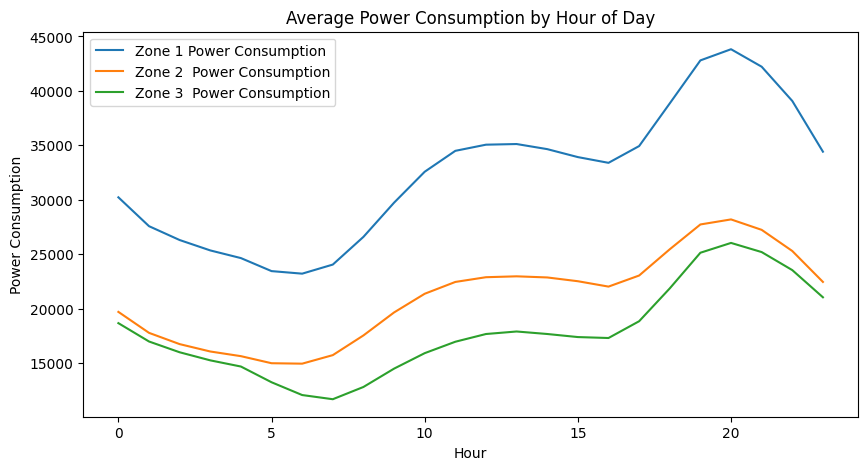

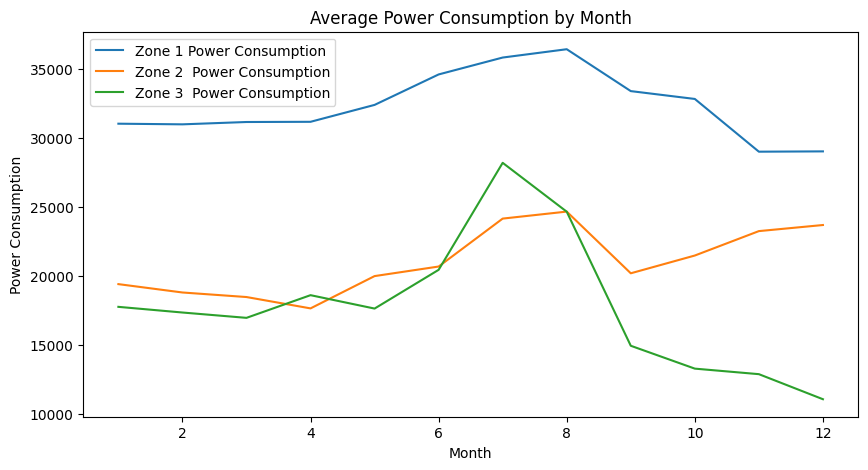

In [110]:
# Extract hour and month
data['hour'] = data.index.hour
data['month'] = data.index.month

# Group by hour to find average usage per time of day
#hourly_usage = data.groupby('hour')[['Zone 1 Power Consumption']].mean()
hourly_usage = data.groupby('hour')[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']].mean()

# Plot time-of-day usage
hourly_usage.plot(figsize=(10, 5))
plt.title('Average Power Consumption by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Power Consumption')
plt.show()

# Group by month to find seasonal trends
monthly_usage = data.groupby('month')[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']].mean()
#monthly_usage = data.groupby('month')[['Zone 1 Power Consumption']].mean()

# Plot seasonal usage
monthly_usage.plot(figsize=(10, 5))
plt.title('Average Power Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Power Consumption')
plt.show()



### 🌦️ 3. Environmental Feature Relationships


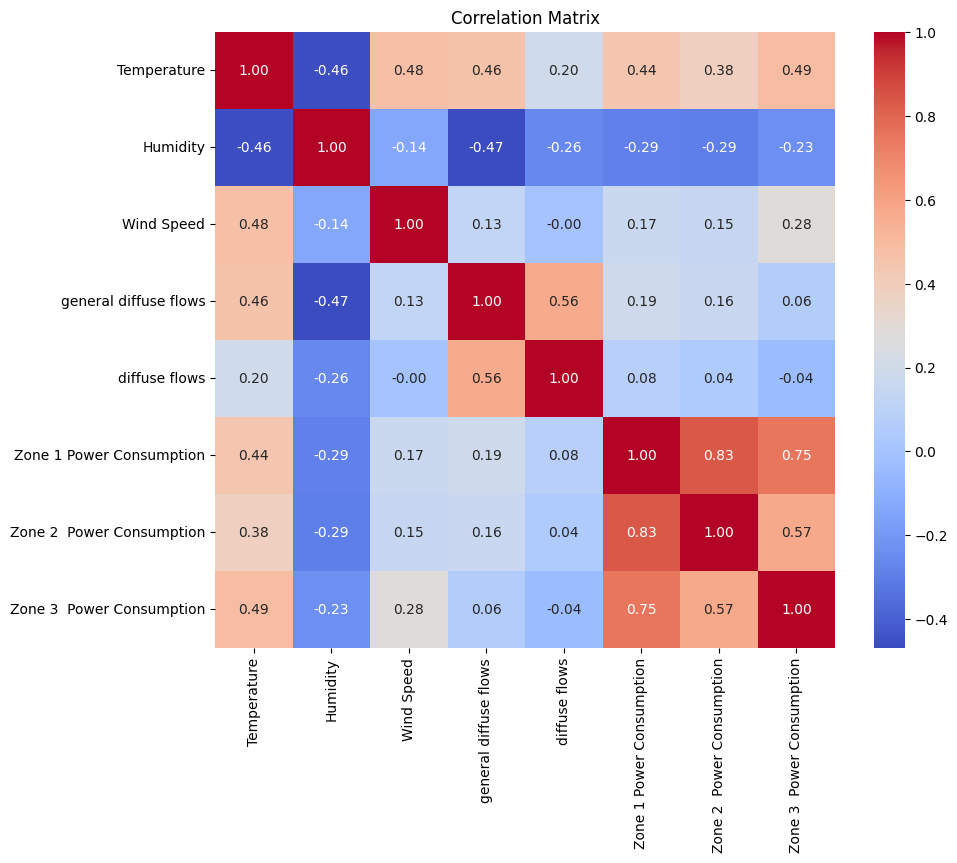

In [111]:
import seaborn as sns

# Select relevant columns

correlation_data = data[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows',
                       'Zone 1 Power Consumption','Zone 2  Power Consumption', 'Zone 3  Power Consumption']]

# Compute correlation matrix
corr_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [112]:
zones = ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']
env_vars = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']

for zone in zones:
    corrs = corr_matrix[zone][env_vars]
    strongest = corrs.abs().idxmax()
    print(f"In {zone}, the strongest correlation is with {strongest} ({corrs[strongest]:.2f})")

In Zone 1 Power Consumption, the strongest correlation is with Temperature (0.44)
In Zone 2  Power Consumption, the strongest correlation is with Temperature (0.38)
In Zone 3  Power Consumption, the strongest correlation is with Temperature (0.49)


In [113]:
inverse_corr = corr_matrix[['Zone 1 Power Consumption']].apply(lambda x: x[x < 0])
print("Inverse correlations:\n", inverse_corr)


Inverse correlations:
           Zone 1 Power Consumption
Humidity                 -0.287421


In [114]:
inverse_corr = corr_matrix[['Zone 2  Power Consumption']].apply(lambda x: x[x < 0])
print("Inverse correlations:\n", inverse_corr)


Inverse correlations:
           Zone 2  Power Consumption
Humidity                  -0.294961


In [115]:
inverse_corr = corr_matrix[['Zone 3  Power Consumption']].apply(lambda x: x[x < 0])
print("Inverse correlations:\n", inverse_corr)


Inverse correlations:
                Zone 3  Power Consumption
Humidity                       -0.233022
diffuse flows                  -0.038506


In [116]:
# Analyze inverse correlations across the three zones

zones = ['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']
env_vars = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']

inverse_corr_summary = {}

for zone in zones:
    inv_corr = corr_matrix[zone][env_vars][corr_matrix[zone][env_vars] < 0]
    inverse_corr_summary[zone] = inv_corr
    print(f"Inverse correlations for {zone}:")
    print(inv_corr)
    print()

# Summary: Which environmental variables are most inversely correlated with each zone?
for zone, inv_corr in inverse_corr_summary.items():
    if not inv_corr.empty:
        strongest = inv_corr.abs().idxmax()
        print(f"In {zone}, the strongest inverse correlation is with {strongest} ({inv_corr[strongest]:.2f})")
    else:
        print(f"In {zone}, no strong inverse correlations with environmental variables.")

Inverse correlations for Zone 1 Power Consumption:
Humidity   -0.287421
Name: Zone 1 Power Consumption, dtype: float64

Inverse correlations for Zone 2  Power Consumption:
Humidity   -0.294961
Name: Zone 2  Power Consumption, dtype: float64

Inverse correlations for Zone 3  Power Consumption:
Humidity        -0.233022
diffuse flows   -0.038506
Name: Zone 3  Power Consumption, dtype: float64

In Zone 1 Power Consumption, the strongest inverse correlation is with Humidity (-0.29)
In Zone 2  Power Consumption, the strongest inverse correlation is with Humidity (-0.29)
In Zone 3  Power Consumption, the strongest inverse correlation is with Humidity (-0.23)


### 4. Lag Effects & Time Dependency



In [117]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21432\1133085963.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


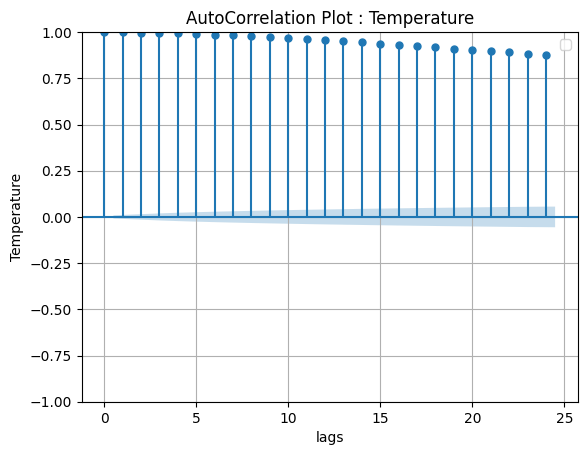

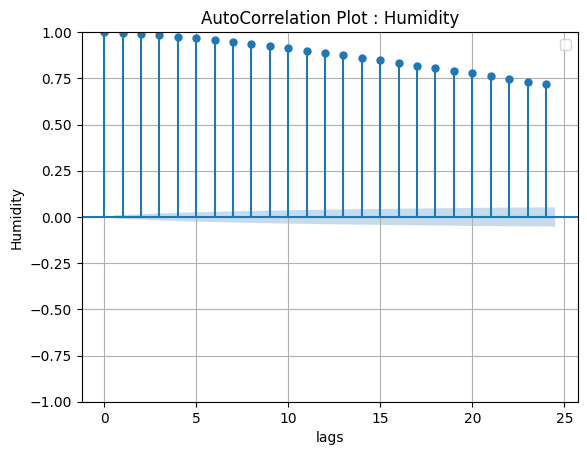

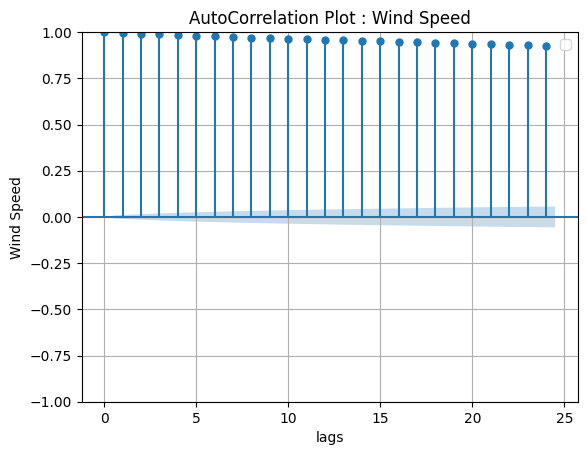

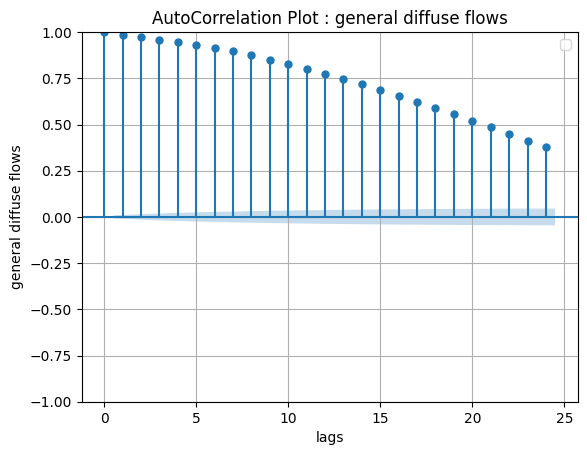

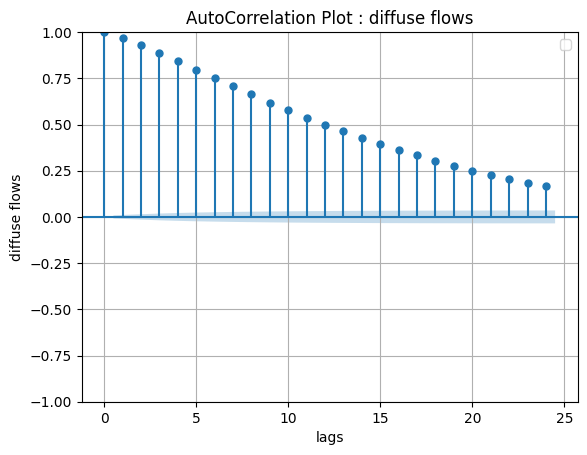

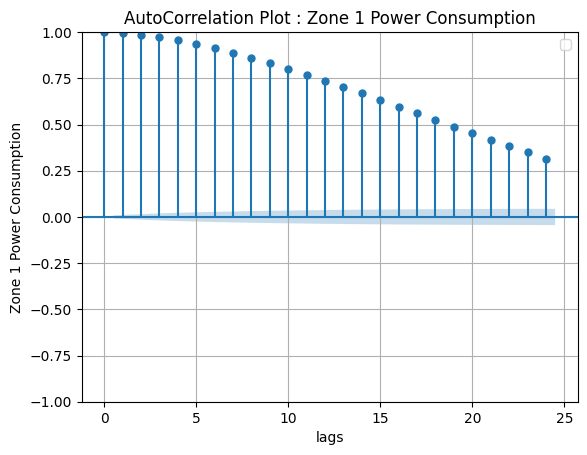

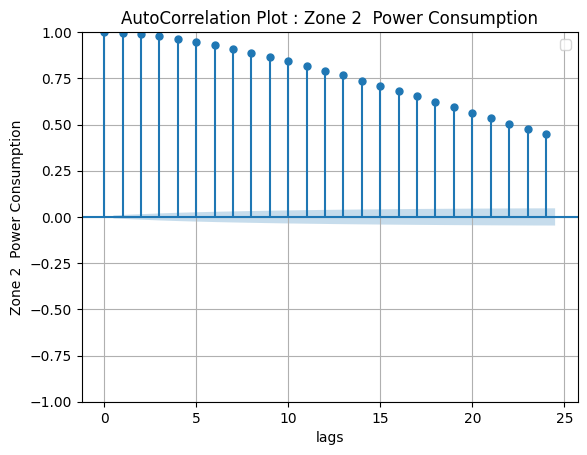

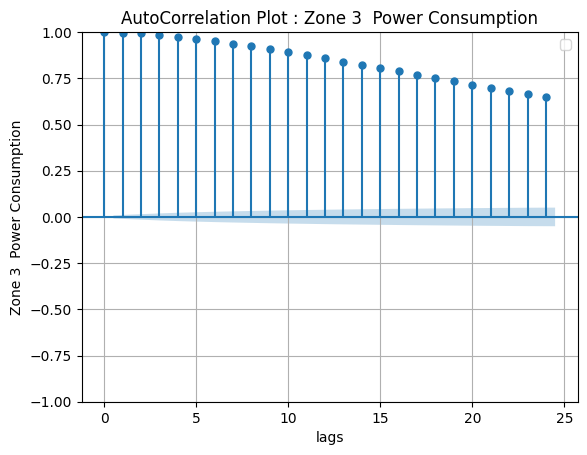

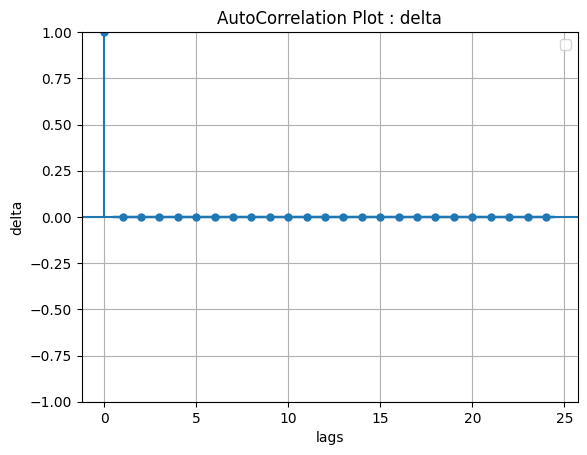

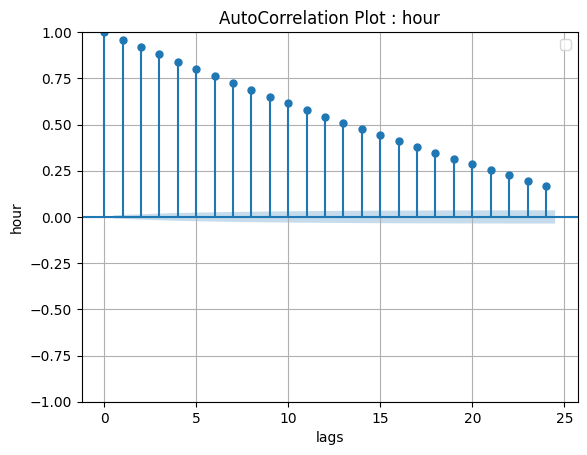

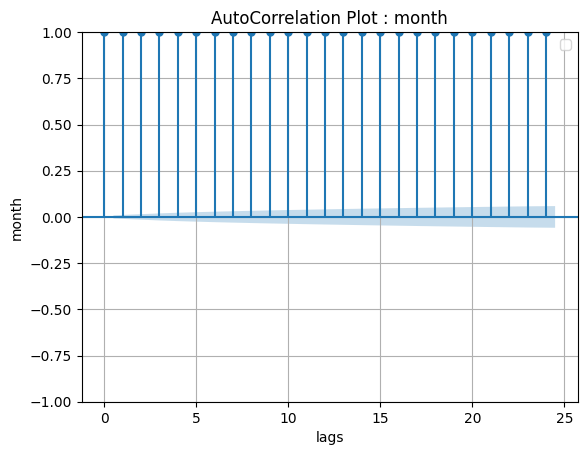

In [118]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
lags = 24
for col in data.columns:
    plot_acf(data[col], lags = lags)
    plt.xlabel("lags")
    plt.ylabel(col)
    plt.title('AutoCorrelation Plot : ' + str(col))
    plt.grid(True)
    plt.legend()
    plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21432\850476496.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


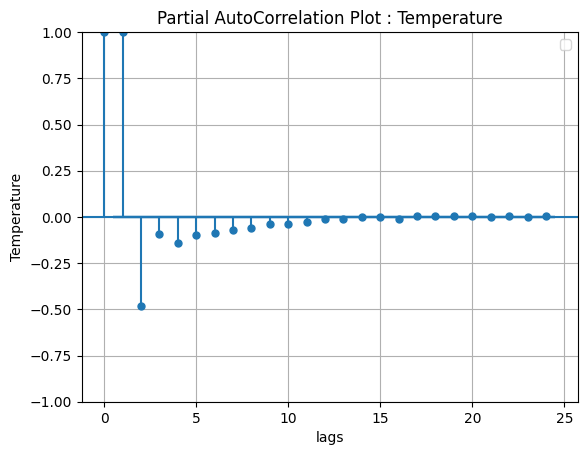

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21432\850476496.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


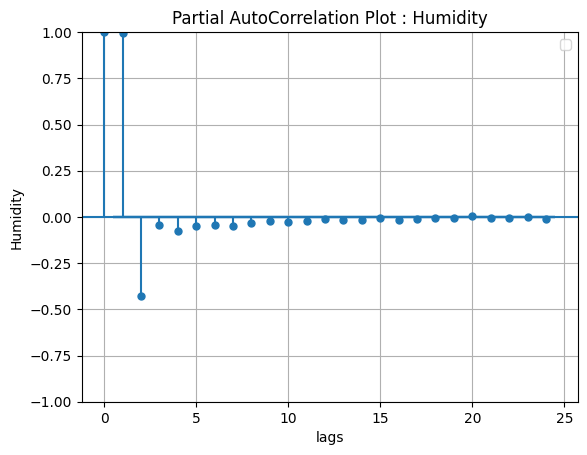

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21432\850476496.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


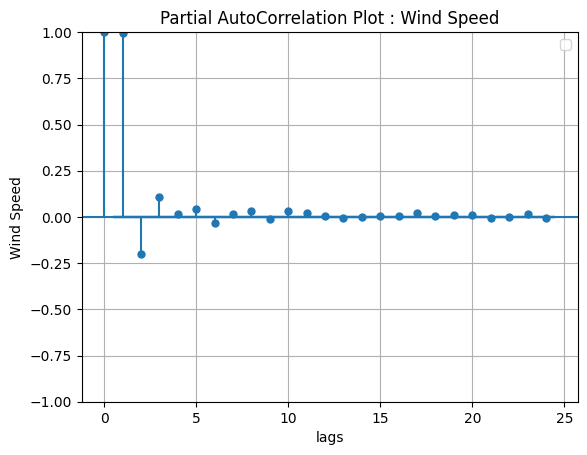

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21432\850476496.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


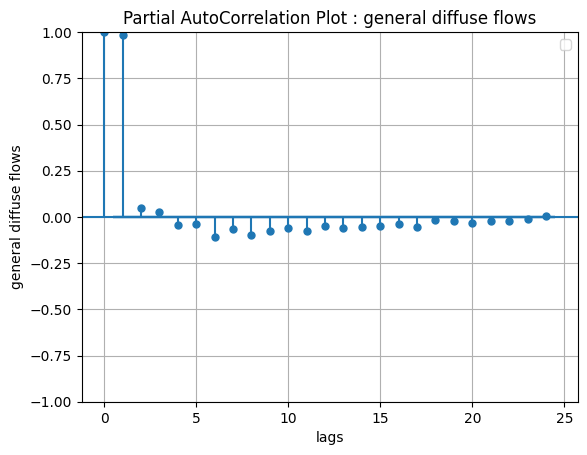

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21432\850476496.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


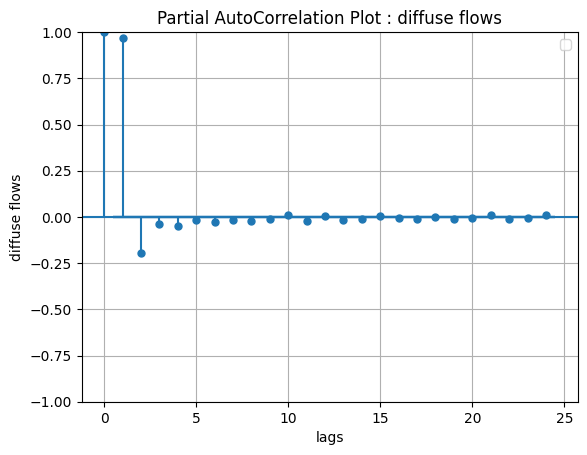

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21432\850476496.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


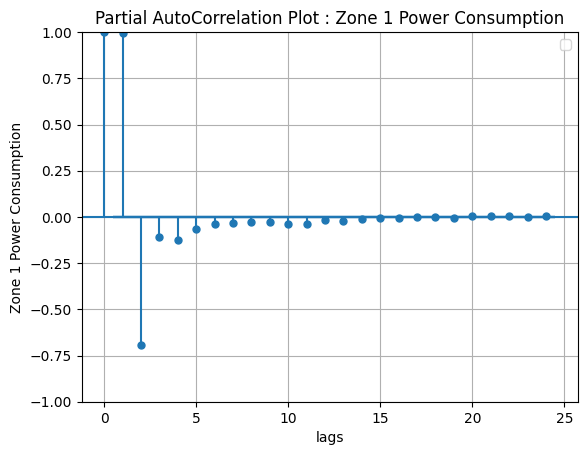

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21432\850476496.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


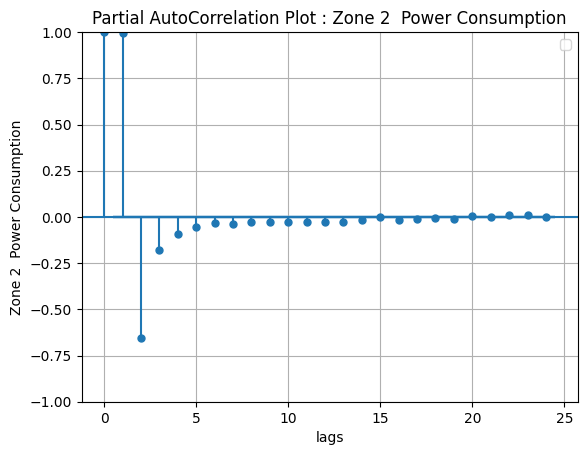

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21432\850476496.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


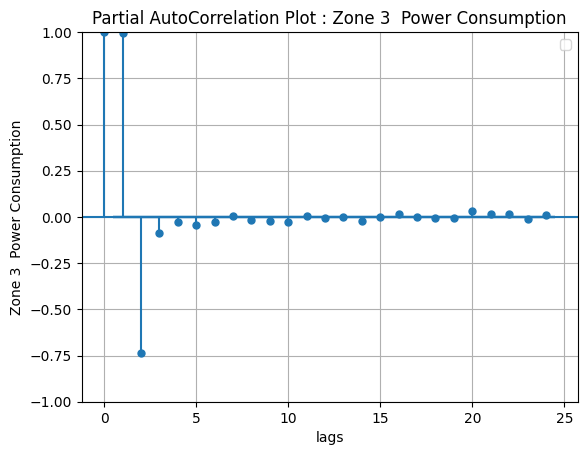

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21432\850476496.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


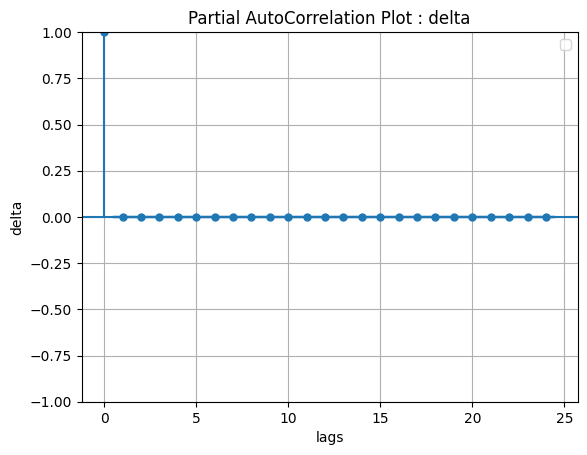

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21432\850476496.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


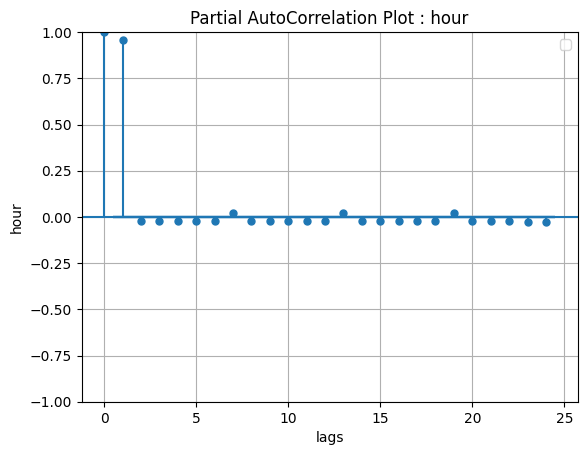

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21432\850476496.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


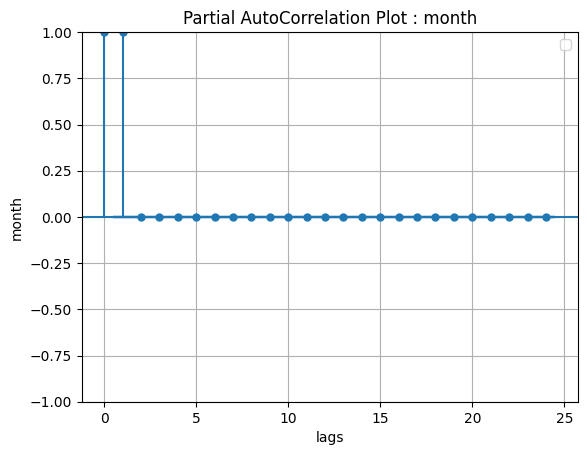

In [119]:
lags = 24
for col in data.columns:
    plot_pacf(data[col], lags = lags)
    plt.xlabel("lags")
    plt.ylabel(col)
    plt.title('Partial AutoCorrelation Plot : ' + str(col))
    plt.grid(True)
    plt.legend()
    plt.show()

In [120]:
shifts= [1,2,3,4,5]
for shift in shifts:
    data[f'temp_lag{shift}'] = data['Temperature'].shift(shift)
    print(f"Correlation for lag {shift}:")
    print(data[[f'temp_lag{shift}', 'Zone 1 Power Consumption']].corr())
    print()
    print(data[[f'temp_lag{shift}', 'Zone 2  Power Consumption']].corr())
    print()
    print(data[[f'temp_lag{shift}', 'Zone 3  Power Consumption']].corr())
    print()

Correlation for lag 1:
                          temp_lag1  Zone 1 Power Consumption
temp_lag1                  1.000000                  0.445045
Zone 1 Power Consumption   0.445045                  1.000000

                           temp_lag1  Zone 2  Power Consumption
temp_lag1                   1.000000                   0.386138
Zone 2  Power Consumption   0.386138                   1.000000

                           temp_lag1  Zone 3  Power Consumption
temp_lag1                   1.000000                   0.495837
Zone 3  Power Consumption   0.495837                   1.000000

Correlation for lag 2:
                          temp_lag2  Zone 1 Power Consumption
temp_lag2                  1.000000                  0.449538
Zone 1 Power Consumption   0.449538                  1.000000

                           temp_lag2  Zone 2  Power Consumption
temp_lag2                   1.000000                   0.389595
Zone 2  Power Consumption   0.389595                   1.000000

 

In [121]:
subset_data = data.iloc[0:100]

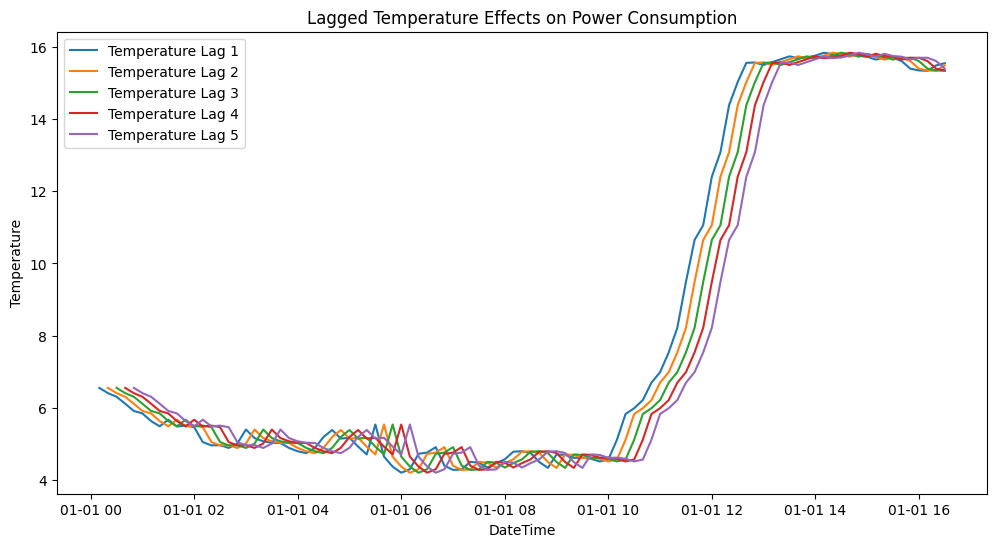

In [122]:
#plot lagged effects
plt.figure(figsize=(12, 6))
for shift in shifts:
    plt.plot(subset_data.index, subset_data[f'temp_lag{shift}'], label=f'Temperature Lag {shift}')
plt.xlabel("DateTime")
plt.ylabel("Temperature")
plt.title("Lagged Temperature Effects on Power Consumption")
plt.legend()
plt.show()

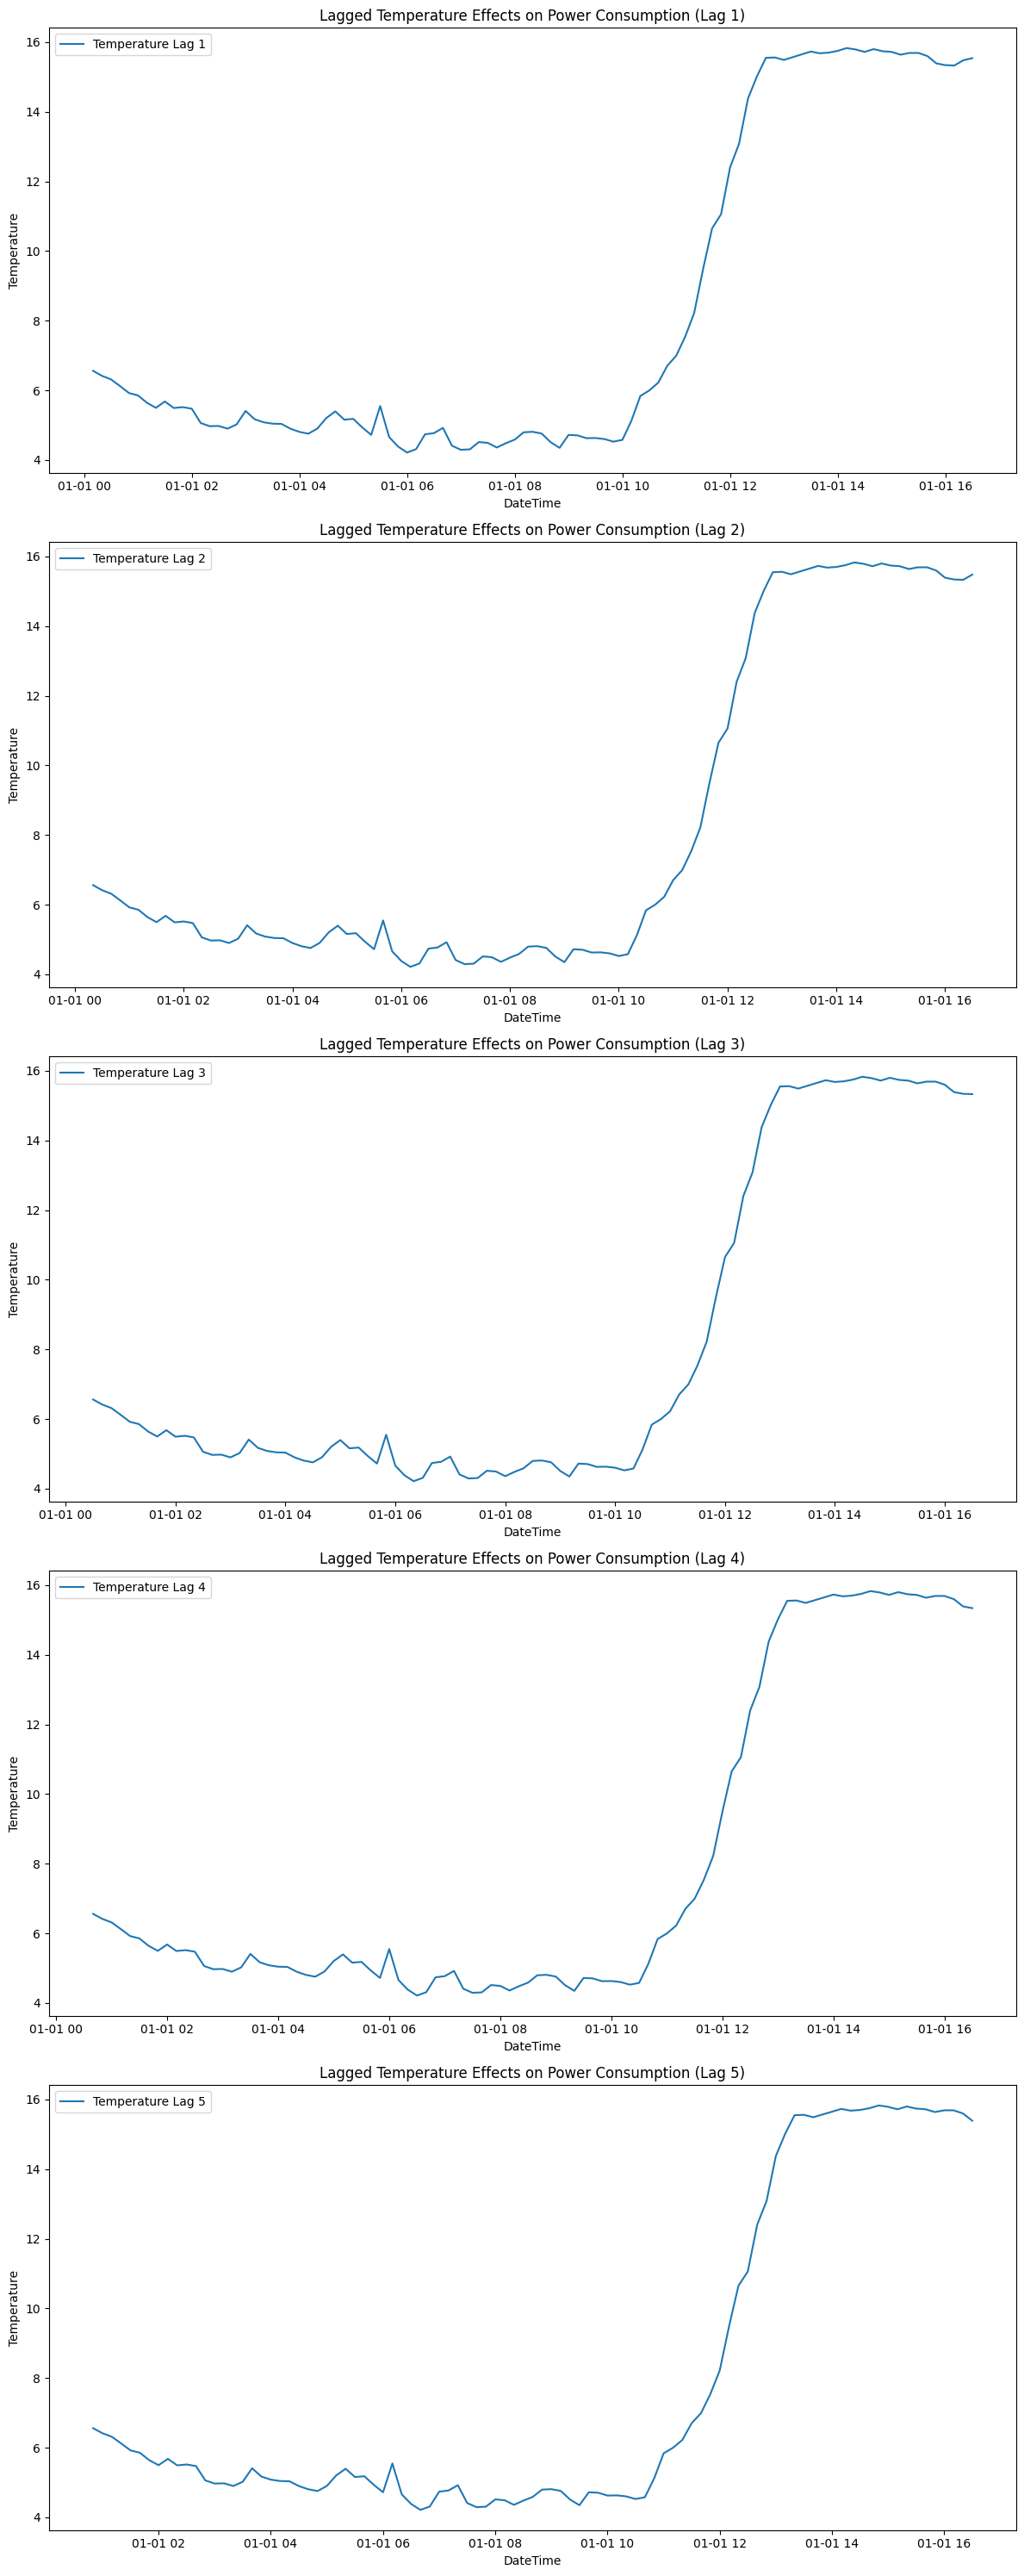

In [123]:
#plot subplot oflagged effects
fig, axes = plt.subplots(nrows=len(shifts), ncols=1, figsize=(
    12, 6 * len(shifts)))
for i, shift in enumerate(shifts):
    axes[i].plot(subset_data.index, subset_data[f'temp_lag{shift}'], label=f'Temperature Lag {shift}')
    axes[i].set_xlabel("DateTime")
    axes[i].set_ylabel("Temperature")
    axes[i].set_title(f"Lagged Temperature Effects on Power Consumption (Lag {shift})")
    axes[i].legend()
plt.tight_layout()
plt.show()
# --- IGNORE ---
# Exporatory Data Analysis


In [124]:

grangercausalitytests(data[['Zone 1 Power Consumption', 'Temperature']], maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=358.6969, p=0.0000  , df_denom=52412, df_num=1
ssr based chi2 test:   chi2=358.7174, p=0.0000  , df=1
likelihood ratio test: chi2=357.4955, p=0.0000  , df=1
parameter F test:         F=358.6969, p=0.0000  , df_denom=52412, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=152.4887, p=0.0000  , df_denom=52409, df_num=2
ssr based chi2 test:   chi2=305.0064, p=0.0000  , df=2
likelihood ratio test: chi2=304.1224, p=0.0000  , df=2
parameter F test:         F=152.4887, p=0.0000  , df_denom=52409, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=105.8953, p=0.0000  , df_denom=52406, df_num=3
ssr based chi2 test:   chi2=317.7282, p=0.0000  , df=3
likelihood ratio test: chi2=316.7690, p=0.0000  , df=3
parameter F test:         F=105.8953, p=0.0000  , df_denom=52406, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=85.8433 

{1: ({'ssr_ftest': (358.6969183826352, 1.0002959722041011e-79, 52412.0, 1),
   'ssr_chi2test': (358.7174497639057, 5.356202025346588e-80, 1),
   'lrtest': (357.49552753020544, 9.883957169828674e-80, 1),
   'params_ftest': (358.6969183826023, 1.0002959722244857e-79, 52412.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (152.48867467647824, 9.267301534139855e-67, 52409.0, 2),
   'ssr_chi2test': (305.00644524768376, 5.870727766146248e-67, 2),
   'lrtest': (304.1224295446882, 9.133842380435551e-67, 2),
   'params_ftest': (152.48867467654827, 9.267301533490066e-67, 52409.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (105.8952572062808, 2.3804336845334657e-68, 52406.0, 3),
   'ssr_chi2test': (317.728205698935, 1.447188775806801e-68, 3),
   'lrtest': (316.7690440372098, 2.3342753081644317e-68, 3),
   'params_ftest': (105.89525720595185, 2.38043368569336e-68, 52406.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0

In [125]:
grangercausalitytests(data[['Zone 2  Power Consumption', 'Temperature']], maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=231.2945, p=0.0000  , df_denom=52412, df_num=1
ssr based chi2 test:   chi2=231.3077, p=0.0000  , df=1
likelihood ratio test: chi2=230.7988, p=0.0000  , df=1
parameter F test:         F=231.2945, p=0.0000  , df_denom=52412, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=100.9246, p=0.0000  , df_denom=52409, df_num=2
ssr based chi2 test:   chi2=201.8685, p=0.0000  , df=2
likelihood ratio test: chi2=201.4808, p=0.0000  , df=2
parameter F test:         F=100.9246, p=0.0000  , df_denom=52409, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=69.4000 , p=0.0000  , df_denom=52406, df_num=3
ssr based chi2 test:   chi2=208.2279, p=0.0000  , df=3
likelihood ratio test: chi2=207.8154, p=0.0000  , df=3
parameter F test:         F=69.4000 , p=0.0000  , df_denom=52406, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=53.1419 

{1: ({'ssr_ftest': (231.2944588575794, 4.022506640312414e-52, 52412.0, 1),
   'ssr_chi2test': (231.30769787491462, 3.0914264983840722e-52, 1),
   'lrtest': (230.79881336225662, 3.9914987484312445e-52, 1),
   'params_ftest': (231.29445885761882, 4.022506640217808e-52, 52412.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (100.92462881796592, 1.7913498414357542e-44, 52409.0, 2),
   'ssr_chi2test': (201.86851475375855, 1.4615342130771676e-44, 2),
   'lrtest': (201.48076943843625, 1.774217308142656e-44, 2),
   'params_ftest': (100.92462881802726, 1.7913498413371356e-44, 52409.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (69.40004646024103, 8.747417692824319e-45, 52406.0, 3),
   'ssr_chi2test': (208.22794919211233, 7.033245296804565e-45, 3),
   'lrtest': (207.81541430961806, 8.635948137042957e-45, 3),
   'params_ftest': (69.40004646035852, 8.747417691276432e-45, 52406.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0.

In [126]:

grangercausalitytests(data[['Zone 3  Power Consumption', 'Temperature']], maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=890.1872, p=0.0000  , df_denom=52412, df_num=1
ssr based chi2 test:   chi2=890.2381, p=0.0000  , df=1
likelihood ratio test: chi2=882.7625, p=0.0000  , df=1
parameter F test:         F=890.1872, p=0.0000  , df_denom=52412, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=204.0035, p=0.0000  , df_denom=52409, df_num=2
ssr based chi2 test:   chi2=408.0459, p=0.0000  , df=2
likelihood ratio test: chi2=406.4658, p=0.0000  , df=2
parameter F test:         F=204.0035, p=0.0000  , df_denom=52409, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=136.8162, p=0.0000  , df_denom=52406, df_num=3
ssr based chi2 test:   chi2=410.5033, p=0.0000  , df=3
likelihood ratio test: chi2=408.9041, p=0.0000  , df=3
parameter F test:         F=136.8162, p=0.0000  , df_denom=52406, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=103.3163

{1: ({'ssr_ftest': (890.1871502696333, 5.647922130373889e-194, 52412.0, 1),
   'ssr_chi2test': (890.2381035141348, 1.300027459301143e-195, 1),
   'lrtest': (882.7625434993533, 5.483739173808174e-194, 1),
   'params_ftest': (890.1871502696313, 5.647922130373889e-194, 52412.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (204.00348225242914, 5.565477495916444e-89, 52409.0, 2),
   'ssr_chi2test': (408.0458897814811, 2.4771987506189032e-89, 2),
   'lrtest': (406.46575552469585, 5.458617290145507e-89, 2),
   'params_ftest': (204.00348225276562, 5.56547749403995e-89, 52409.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (136.8161529817585, 2.675480371890373e-88, 52406.0, 3),
   'ssr_chi2test': (410.50328356865106, 1.1748896227317605e-88, 3),
   'lrtest': (408.90407907916233, 2.608653650785226e-88, 3),
   'params_ftest': (136.81615298186082, 2.6754803714836256e-88, 52406.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 

In [127]:
grangercausalitytests(data[['Zone 3  Power Consumption', 'Temperature']], maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=890.1872, p=0.0000  , df_denom=52412, df_num=1
ssr based chi2 test:   chi2=890.2381, p=0.0000  , df=1
likelihood ratio test: chi2=882.7625, p=0.0000  , df=1
parameter F test:         F=890.1872, p=0.0000  , df_denom=52412, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=204.0035, p=0.0000  , df_denom=52409, df_num=2
ssr based chi2 test:   chi2=408.0459, p=0.0000  , df=2
likelihood ratio test: chi2=406.4658, p=0.0000  , df=2
parameter F test:         F=204.0035, p=0.0000  , df_denom=52409, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=136.8162, p=0.0000  , df_denom=52406, df_num=3
ssr based chi2 test:   chi2=410.5033, p=0.0000  , df=3
likelihood ratio test: chi2=408.9041, p=0.0000  , df=3
parameter F test:         F=136.8162, p=0.0000  , df_denom=52406, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=103.3163

{1: ({'ssr_ftest': (890.1871502696333, 5.647922130373889e-194, 52412.0, 1),
   'ssr_chi2test': (890.2381035141348, 1.300027459301143e-195, 1),
   'lrtest': (882.7625434993533, 5.483739173808174e-194, 1),
   'params_ftest': (890.1871502696313, 5.647922130373889e-194, 52412.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (204.00348225242914, 5.565477495916444e-89, 52409.0, 2),
   'ssr_chi2test': (408.0458897814811, 2.4771987506189032e-89, 2),
   'lrtest': (406.46575552469585, 5.458617290145507e-89, 2),
   'params_ftest': (204.00348225276562, 5.56547749403995e-89, 52409.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (136.8161529817585, 2.675480371890373e-88, 52406.0, 3),
   'ssr_chi2test': (410.50328356865106, 1.1748896227317605e-88, 3),
   'lrtest': (408.90407907916233, 2.608653650785226e-88, 3),
   'params_ftest': (136.81615298186082, 2.6754803714836256e-88, 52406.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 

In [128]:
shifting_data = data[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows','diffuse flows']]
analyse_shifting_on_data = data[['Zone 1 Power Consumption','Zone 2  Power Consumption', 'Zone 3  Power Consumption']]
shifts = [1,2,3]
[data[shifting_data.columns].shift(shift).corrwith(data[analyse_shifting_on_data.columns]) for shift in shifts    ]
#for each shift, calculate the correlation between shifted environmental variables and power consumption
# Identify and treat outliers in the dataset
outliers = data[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows',
                 'Zone 1 Power Consumption','Zone 2  Power Consumption', 'Zone 3  Power Consumption']].apply(
    lambda x: (x < (x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))) |
               (x > (x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))))

In [129]:
#for each shift, shift shifting_data  on analyse_shifting_on_data
for shift in shifts:
    shifted_data = shifting_data.shift(shift)
    for env_col in shifted_data.columns:
        for zone_col in analyse_shifting_on_data.columns:
            correlation = shifted_data[env_col].corr(analyse_shifting_on_data[zone_col])
            print(f"Shift: {shift}, Correlation between {env_col} and {zone_col}: {correlation:.2f}")

Shift: 1, Correlation between Temperature and Zone 1 Power Consumption: 0.45
Shift: 1, Correlation between Temperature and Zone 2  Power Consumption: 0.39
Shift: 1, Correlation between Temperature and Zone 3  Power Consumption: 0.50
Shift: 1, Correlation between Humidity and Zone 1 Power Consumption: -0.30
Shift: 1, Correlation between Humidity and Zone 2  Power Consumption: -0.30
Shift: 1, Correlation between Humidity and Zone 3  Power Consumption: -0.24
Shift: 1, Correlation between Wind Speed and Zone 1 Power Consumption: 0.17
Shift: 1, Correlation between Wind Speed and Zone 2  Power Consumption: 0.15
Shift: 1, Correlation between Wind Speed and Zone 3  Power Consumption: 0.28
Shift: 1, Correlation between general diffuse flows and Zone 1 Power Consumption: 0.20
Shift: 1, Correlation between general diffuse flows and Zone 2  Power Consumption: 0.17
Shift: 1, Correlation between general diffuse flows and Zone 3  Power Consumption: 0.08
Shift: 1, Correlation between diffuse flows and

In [130]:

data['Temperature_lag1'] = data['Temperature'].shift(1)
data['Humidity_lag2'] = data['Humidity'].shift(2)


In [131]:
#Check the correlation between lagged features and the target variable.
print(data[['Temperature_lag1', 'Zone 1 Power Consumption']].corr())
print(data[['Temperature_lag1', 'Zone 1 Power Consumption']].corr())


                          Temperature_lag1  Zone 1 Power Consumption
Temperature_lag1                  1.000000                  0.445045
Zone 1 Power Consumption          0.445045                  1.000000
                          Temperature_lag1  Zone 1 Power Consumption
Temperature_lag1                  1.000000                  0.445045
Zone 1 Power Consumption          0.445045                  1.000000


In [132]:
#

In [133]:
from statsmodels.tsa.stattools import adfuller
def is_stationarity(series):
    result = adfuller(series)
    if result[1] > 0.05:
        print(f'{series.name} is not stationary')
    else:
        print(f'{series.name} is stationary')




In [134]:
data.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption', 'delta',
       'hour', 'month', 'temp_lag1', 'temp_lag2', 'temp_lag3', 'temp_lag4',
       'temp_lag5', 'Temperature_lag1', 'Humidity_lag2'],
      dtype='object')

In [135]:
data.drop(['delta',
       'hour', 'month', 'temp_lag1', 'temp_lag2', 'temp_lag3', 'temp_lag4',
       'temp_lag5', 'Temperature_lag1', 'Humidity_lag2'], axis=1, inplace=True)

In [136]:
data_cleaned = data.dropna()
for column in data_cleaned.columns:
    is_stationarity(data_cleaned[column])

Temperature is stationary
Humidity is stationary
Wind Speed is stationary
general diffuse flows is stationary
diffuse flows is stationary
Zone 1 Power Consumption is stationary
Zone 2  Power Consumption is stationary
Zone 3  Power Consumption is stationary


In [137]:
from statsmodels.tsa.api import VAR
scaler = MinMaxScaler()
data_cleaned = scaler.fit_transform(data_cleaned)
data_cleaned = pd.DataFrame(data_cleaned, columns=data.columns)
model = VAR(data_cleaned.iloc[0:144])

In [138]:
# Selection Optimal Lag Order for VAR model
lag_order = model.select_order(maxlags=5)
print(lag_order.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -47.03      -46.86   3.777e-21      -46.96
1      -71.25      -69.73   1.137e-31      -70.64
2      -73.60     -70.73*   1.101e-32     -72.43*
3      -73.95      -69.73   7.907e-33      -72.23
4     -74.54*      -68.96  4.582e-33*      -72.27
5      -74.19      -67.26   6.964e-33      -71.38
-------------------------------------------------


In [139]:
# Fit the model to the data using the lowest AIC
model_fitted = model.fit(maxlags=5, ic= 'aic')

In [140]:
n_forecast_steps = 10
forecast = model_fitted.forecast(data.iloc[0:143].values[-model_fitted.k_ar:], steps = n_forecast_steps)
forecast_df = pd.DataFrame(forecast, index =pd.date_range(start=data.iloc[0:143].index[-1],periods=n_forecast_steps), columns=data.columns) #changed period to work
forecast_df['Temperature']

2017-01-01 23:40:00     416.475160
2017-01-02 23:40:00    1039.582685
2017-01-03 23:40:00    1765.328045
2017-01-04 23:40:00    2497.953718
2017-01-05 23:40:00    3102.318007
2017-01-06 23:40:00    3689.179773
2017-01-07 23:40:00    4282.797369
2017-01-08 23:40:00    4889.731228
2017-01-09 23:40:00    5525.120176
2017-01-10 23:40:00    6182.779303
Freq: D, Name: Temperature, dtype: float64

### 5, Outliers


In [141]:
#detect any outliers in the weather or consumption readings?
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
outliers = ((data < lower_lim) | (data > upper_lim)).sum()
print("Number of outliers in each column:\n", outliers)


Number of outliers in each column:
 Temperature                   142
Humidity                      291
Wind Speed                      0
general diffuse flows        2315
diffuse flows                4571
Zone 1 Power Consumption        0
Zone 2  Power Consumption       7
Zone 3  Power Consumption    1191
dtype: int64


In [142]:
#Sum of outliers
outlier_sum = outliers.sum()
print("Total number of outliers across all columns:", outlier_sum)


Total number of outliers across all columns: 8517


In [143]:
# Percentage of total outlier
outlier_percentage = ((outliers / data.shape[0]) * 100).sum()
print("Percentage of outliers in each column:\n", round(outlier_percentage),2 , "%")

Percentage of outliers in each column:
 16 2 %


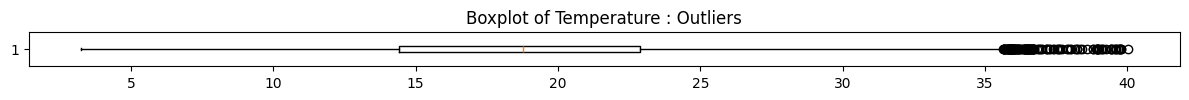

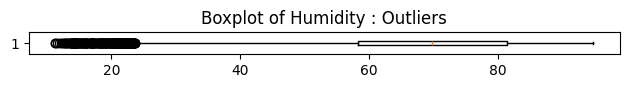

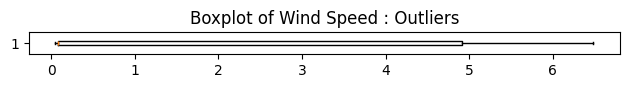

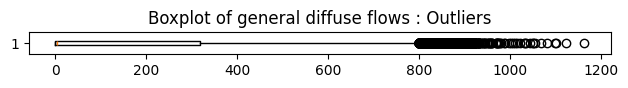

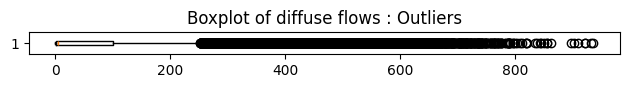

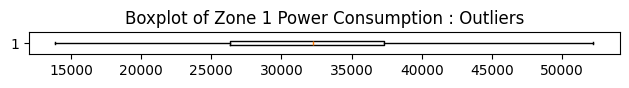

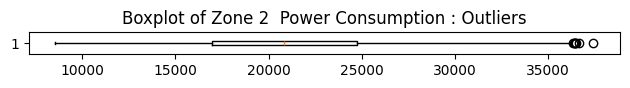

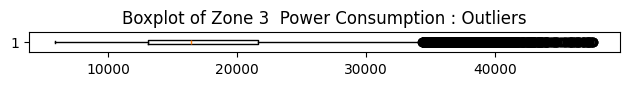

In [144]:
# Visualize the outliers
plt.figure(figsize=(12, 6))
for column in data.columns:
    plt.subplot(len(data.columns), 1, data.columns.get_loc(column) + 1)
    plt.boxplot(data[column].dropna(), vert=False)
    plt.title(f'Boxplot of {column} : Outliers')
    plt.tight_layout()
    plt.show()

In [145]:
#simpleImputter outliers
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns, index=data.index)
#!/usr/bin/env python3
data_imputed.shape

(52416, 8)

In [146]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
outliers = ((data < lower_lim) | (data > upper_lim)).sum()
print("Number of outliers in each column:\n", outliers)


Number of outliers in each column:
 Temperature                   142
Humidity                      291
Wind Speed                      0
general diffuse flows        2315
diffuse flows                4571
Zone 1 Power Consumption        0
Zone 2  Power Consumption       7
Zone 3  Power Consumption    1191
dtype: int64


In [147]:
#identify anomalies
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.01)
iso_forest.fit(data)
anomalies = iso_forest.predict(data)
data['anomaly'] = anomalies
data['anomaly'].value_counts()


anomaly
 1    51891
-1      525
Name: count, dtype: int64

In [148]:
# treate anomalies
data = data[data['anomaly'] == 1]
data.drop('anomaly', axis=1, inplace=True)
#!/usr/bin/env python3

Correlation between Temperature_lag1 and current Power: 0.43
Correlation between Temperature_lag2 and current Power: 0.43
Correlation between Temperature_lag3 and current Power: 0.44
Correlation between Temperature_lag4 and current Power: 0.44
Correlation between Temperature_lag5 and current Power: 0.45


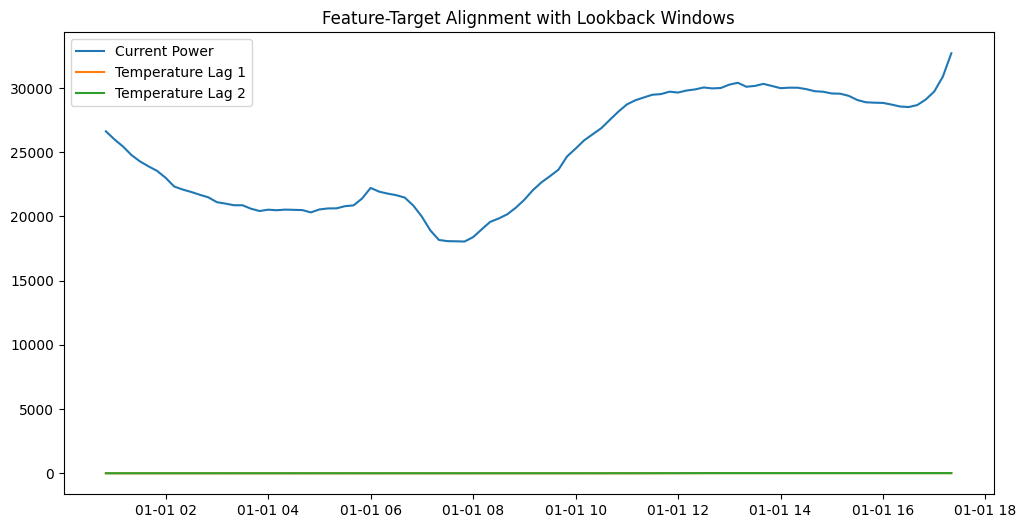

In [149]:
# # Create lagged features (lookback window of 3)
lookback = 5
for lag in range(1, lookback + 1):
    data[f'Temperature_lag{lag}'] = data['Temperature'].shift(lag)
    data[f'Power_lag{lag}'] = data['Zone 1 Power Consumption'].shift(lag)

# Drop rows with NaN values due to shifting
data_lagged = data.dropna()

# Correlation between lagged features and target
for lag in range(1, lookback + 1):
    corr = data_lagged[[f'Temperature_lag{lag}', 'Zone 1 Power Consumption']].corr().iloc[0,1]
    print(f'Correlation between Temperature_lag{lag} and current Power: {corr:.2f}')

# Visualize alignment
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
# Plot a smaller subset of the data
subset_data = data_lagged.iloc[0:100]
plt.plot(subset_data.index, subset_data['Zone 1 Power Consumption'], label='Current Power')
plt.plot(subset_data.index, subset_data['Temperature_lag1'], label='Temperature Lag 1')
plt.plot(subset_data.index, subset_data['Temperature_lag2'], label='Temperature Lag 2')
plt.legend()
plt.title('Feature-Target Alignment with Lookback Windows')
plt.show()

Correlation between Temperature_lag1 and current Power: 0.36
Correlation between Temperature_lag2 and current Power: 0.37
Correlation between Temperature_lag3 and current Power: 0.37
Correlation between Temperature_lag4 and current Power: 0.37
Correlation between Temperature_lag5 and current Power: 0.38


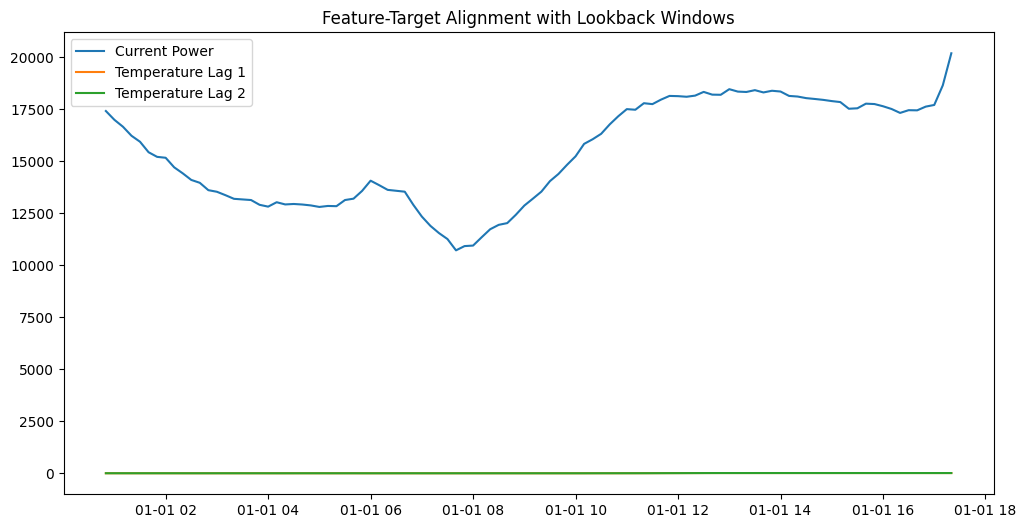

In [150]:
# # Create lagged features (lookback window of 3)
lookback = 5
for lag in range(1, lookback + 1):
    data[f'Temperature_lag{lag}'] = data['Temperature'].shift(lag)
    data[f'Power_lag{lag}'] = data['Zone 2  Power Consumption'].shift(lag)

# Drop rows with NaN values due to shifting
data_lagged = data.dropna()

# Correlation between lagged features and target
for lag in range(1, lookback + 1):
    corr = data_lagged[[f'Temperature_lag{lag}', 'Zone 2  Power Consumption']].corr().iloc[0,1]
    print(f'Correlation between Temperature_lag{lag} and current Power: {corr:.2f}')

# Visualize alignment
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
# Plot a smaller subset of the data
subset_data = data_lagged.iloc[0:100]
plt.plot(subset_data.index, subset_data['Zone 2  Power Consumption'], label='Current Power')
plt.plot(subset_data.index, subset_data['Temperature_lag1'], label='Temperature Lag 1')
plt.plot(subset_data.index, subset_data['Temperature_lag2'], label='Temperature Lag 2')
plt.legend()
plt.title('Feature-Target Alignment with Lookback Windows')
plt.show()

Correlation between Temperature_lag1 and current Power: 0.47
Correlation between Temperature_lag2 and current Power: 0.48
Correlation between Temperature_lag3 and current Power: 0.48
Correlation between Temperature_lag4 and current Power: 0.49
Correlation between Temperature_lag5 and current Power: 0.50


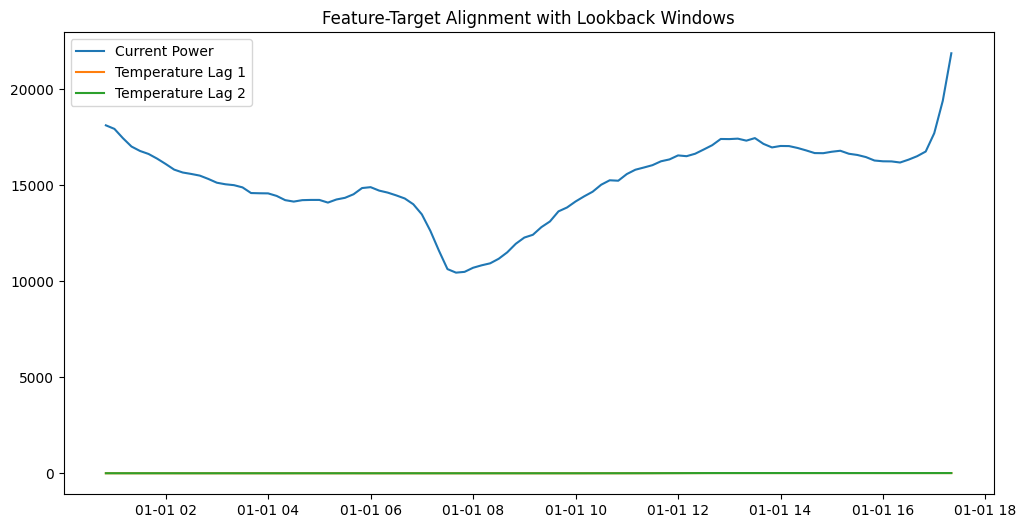

In [151]:
# # Create lagged features (lookback window of 3)
lookback = 5
for lag in range(1, lookback + 1):
    data[f'Temperature_lag{lag}'] = data['Temperature'].shift(lag)
    data[f'Power_lag{lag}'] = data['Zone 3  Power Consumption'].shift(lag)

# Drop rows with NaN values due to shifting
data_lagged = data.dropna()

# Correlation between lagged features and target
for lag in range(1, lookback + 1):
    corr = data_lagged[[f'Temperature_lag{lag}', 'Zone 3  Power Consumption']].corr().iloc[0,1]
    print(f'Correlation between Temperature_lag{lag} and current Power: {corr:.2f}')

# Visualize alignment
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
# Plot a smaller subset of the data
subset_data = data_lagged.iloc[0:100]
plt.plot(subset_data.index, subset_data['Zone 3  Power Consumption'], label='Current Power')
plt.plot(subset_data.index, subset_data['Temperature_lag1'], label='Temperature Lag 1')
plt.plot(subset_data.index, subset_data['Temperature_lag2'], label='Temperature Lag 2')
plt.legend()
plt.title('Feature-Target Alignment with Lookback Windows')
plt.show()

.